1. Uzupełnianie luk w danych danymi z sąsiednich sensorów

In [84]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import sys
from math import cos, asin, sqrt

# 2. This is algorithm to find closest sensor to main sensor
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

# function to find closest sensor of this main one

def find_closest_sensor(main_sensor_id, old_sensor_id1, old_sensor_id2, old_sensor_id3, old_sensor_id4, old_sensor_id5):
    all_sensor_coordinates=[]
    # 4. I create array with coordinates of my main sensor
    for x in range(1,row_count_sensors):
        if int(sensor_locations[x,0])==main_sensor_id:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            main_sensor_coordinates = {'lat': lat, 'lon': lon}
           
    for x in range(1,row_count_sensors):
        if int(sensor_locations[x,0])==old_sensor_id1:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            old_sensor_coordinates1 = {'lat': lat, 'lon': lon}
            break
        else:
            old_sensor_coordinates1 = {'lat': 0, 'lon': 0}

    for x in range(1,row_count_sensors):
        if int(sensor_locations[x,0])==old_sensor_id2:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            old_sensor_coordinates2 = {'lat': lat, 'lon': lon}
            break
        else:
            old_sensor_coordinates2 = {'lat': 0, 'lon': 0}

    for x in range(1,row_count_sensors): 
        if int(sensor_locations[x,0])==old_sensor_id3:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            old_sensor_coordinates3 = {'lat': lat, 'lon': lon}
            break
        else:
            old_sensor_coordinates3 = {'lat': 0, 'lon': 0}
           
    for x in range(1,row_count_sensors): 
        if int(sensor_locations[x,0])==old_sensor_id4:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            old_sensor_coordinates4 = {'lat': lat, 'lon': lon}
            break
        else:
            old_sensor_coordinates4 = {'lat': 0, 'lon': 0}
            
    for x in range(1,row_count_sensors): 
        if int(sensor_locations[x,0])==old_sensor_id5:
            lon = sensor_locations[x,2]
            lat = sensor_locations[x,1]
            old_sensor_coordinates5 = {'lat': lat, 'lon': lon}
            break
        else:
            old_sensor_coordinates5 = {'lat': 0, 'lon': 0}
          
    # 5. I create array with all sensors coordinates (to be able to make comparisons)
    for x in range(1,row_count_sensors):
        lon = sensor_locations[x,2]
        lat = sensor_locations[x,1]  
        all_sensor_coordinates.append({'lat': lat, 'lon': lon})
    #jeśli mamy zapasowe koordynaty, to je usuwamy

    all_sensor_coordinates.remove(main_sensor_coordinates)
    if old_sensor_coordinates1['lat'] != 0:
        all_sensor_coordinates.remove(old_sensor_coordinates1)
    if old_sensor_coordinates2['lat'] != 0:
        all_sensor_coordinates.remove(old_sensor_coordinates2)
    if old_sensor_coordinates3['lat'] != 0:
        all_sensor_coordinates.remove(old_sensor_coordinates3)
    if old_sensor_coordinates4['lat'] != 0:
        all_sensor_coordinates.remove(old_sensor_coordinates4)
    if old_sensor_coordinates5['lat'] != 0:
        all_sensor_coordinates.remove(old_sensor_coordinates5)
    

    # 6. I look for closest sensor of my main sensor

    
    closest_sensor_coordinates = closest(all_sensor_coordinates, main_sensor_coordinates)
    
    
    # 7. I check which sensor (id) is the closest
    for y in range(1,row_count_sensors):
        if sensor_locations[y,1] == closest_sensor_coordinates['lat'] and sensor_locations[y,2] == closest_sensor_coordinates['lon']:
            closest_sensor_id = int(sensor_locations[y,0])
    return closest_sensor_id

In [85]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import sys
from math import cos, asin, sqrt

# 1. I chose my main sensor
our_sensor_id = 142
# 3. I read data and declare arrays
sensor_locations = genfromtxt('/home/marietta/MGR/Data/Sensors/sensor_locations.csv', delimiter=',')
airly_january = genfromtxt('/home/marietta/MGR/Data/Sensors/january-2017.csv', delimiter=',', dtype='str')
airly_february = genfromtxt('/home/marietta/MGR/Data/Sensors/february-2017.csv', delimiter=',', dtype='str')
airly_march = genfromtxt('/home/marietta/MGR/Data/Sensors/march-2017.csv', delimiter=',', dtype='str')
airly_april = genfromtxt('/home/marietta/MGR/Data/Sensors/april-2017.csv', delimiter=',', dtype='str')
airly_may = genfromtxt('/home/marietta/MGR/Data/Sensors/may-2017.csv', delimiter=',', dtype='str')
airly_june = genfromtxt('/home/marietta/MGR/Data/Sensors/june-2017.csv', delimiter=',', dtype='str')
airly_july = genfromtxt('/home/marietta/MGR/Data/Sensors/july-2017.csv', delimiter=',', dtype='str')
airly_august = genfromtxt('/home/marietta/MGR/Data/Sensors/august-2017.csv', delimiter=',', dtype='str')
airly_september = genfromtxt('/home/marietta/MGR/Data/Sensors/september-2017.csv', delimiter=',', dtype='str')
airly_october = genfromtxt('/home/marietta/MGR/Data/Sensors/october-2017.csv', delimiter=',', dtype='str')
airly_november = genfromtxt('/home/marietta/MGR/Data/Sensors/november-2017.csv', delimiter=',', dtype='str')
airly_december =  genfromtxt('/home/marietta/MGR/Data/Sensors/december-2017.csv', delimiter=',', dtype='str')

main_sensor_coordinates=[]
all_sensor_coordinates=[]
closest_sensor_coordinates=[]
row_count_sensors = sum(1 for row in sensor_locations)

#------------------------------------------------------------------------------------------------

# function to find zero and replace

In [86]:
from statistics import median

In [120]:
def fill_data(airly_data, month):
    def look_for_zero(closest_sensor_id1, closest_sensor_id2, closest_sensor_id3, closest_sensor_id4, closest_sensor_id5, closest_sensor_id6, value):
        def subfunction1(missing_row, main_column):
            for c in range(1,column_count_january):
                if airly_data[0,c] == str(closest_sensor_id1) + value:
                    column_number = c

            if airly_data[missing_row,column_number] =="":
                #print(missing_row)
                subfunction2(missing_row, main_column)
            else:
                airly_data[missing_row, main_column] = airly_data[missing_row, column_number]
                             
        def subfunction2(missing_row, main_column):
            for e in range(1,column_count_january):
                if airly_data[0,e] == str(closest_sensor_id2) + value:
                    column_number = e
                   
            if airly_data[missing_row, column_number] =="":
                
                subfunction3(missing_row, main_column)
            else:
                airly_data[missing_row, main_column] = airly_data[missing_row, column_number]
                
        def subfunction3(missing_row, main_column):
            for f in range(1,column_count_january):
                if airly_data[0,f] == str(closest_sensor_id3) + value:
                    column_number = f
                   
            if airly_data[missing_row, column_number] =="":
                
                subfunction4(missing_row, main_column)
            else:
                airly_data[missing_row, main_column] = airly_data[missing_row, column_number]
                
        def subfunction4(missing_row, main_column):
            for g in range(1,column_count_january):
                if airly_data[0,g] == str(closest_sensor_id4) + value:
                    column_number = g   
                    
            if airly_data[missing_row, column_number] =="":
                subfunction5(missing_row, main_column)
            else:
                airly_data[missing_row, main_column] = airly_data[missing_row, column_number]
                
        def subfunction5(missing_row, main_column):
            for h in range(1,column_count_january):
                if airly_data[0,h] == str(closest_sensor_id5) + value:
                    column_number = h       
            if airly_data[missing_row, column_number] =="":
                value1 = float(airly_data[missing_row-1, main_column])
                value2 = airly_data[missing_row+1, main_column]
                if value2 == "":
                    value2 = airly_data[missing_row+20, main_column]
                value2 = float(value2)
                new_input = int(round(median([value1, value2])))
                airly_data[missing_row, main_column] = new_input
            else:
                airly_data[missing_row, main_column] = airly_data[missing_row, column_number]
                      
        
        # main and first
        for a in range(1,column_count_january):
            if airly_data[0,a] == str(our_sensor_id) + value:
                for b in range(1,row_count_january):
                    if airly_data[b,a] =="":
                        missing_row = b
                        main_column = a
                        subfunction1(missing_row, main_column)
                           
        return airly_data
        
    closest_sensor_id1 = find_closest_sensor(our_sensor_id, 0, 0, 0, 0, 0)
    closest_sensor_id2 = find_closest_sensor(our_sensor_id, closest_sensor_id1, 0, 0, 0, 0)
    closest_sensor_id3 = find_closest_sensor(our_sensor_id, closest_sensor_id1, closest_sensor_id2, 0, 0, 0)
    closest_sensor_id4 = find_closest_sensor(our_sensor_id, closest_sensor_id1, closest_sensor_id2, closest_sensor_id3, 0, 0)
    closest_sensor_id5 = find_closest_sensor(our_sensor_id, closest_sensor_id1, closest_sensor_id2, closest_sensor_id3, closest_sensor_id4, 0)
    closest_sensor_id6 = find_closest_sensor(our_sensor_id, closest_sensor_id1, closest_sensor_id2, closest_sensor_id3, closest_sensor_id4, closest_sensor_id5)
    print(closest_sensor_id1)
    print(closest_sensor_id2)
    print(closest_sensor_id3)
    print(closest_sensor_id4)
    print(closest_sensor_id5)
    print(closest_sensor_id6)
    # 8. I check if my main sensor has 0/null anywhere, if yes, I check if my closest sensor has value in the same place\n",
    column_count_january = sum(1 for column in airly_data.T)
    row_count_january = sum(1 for column in airly_data)
    pm25 = []

    value1 = "_pm25"
    value2 = "_temperature"
    value3 = "_humidity"
    value4 = "_pressure"
    new_airly_data = look_for_zero(closest_sensor_id1, closest_sensor_id2, closest_sensor_id3,  closest_sensor_id4, closest_sensor_id5, closest_sensor_id6, value1)
    new_airly_data = look_for_zero(closest_sensor_id1, closest_sensor_id2, closest_sensor_id3,  closest_sensor_id4, closest_sensor_id5, closest_sensor_id6, value2)
    new_airly_data = look_for_zero(closest_sensor_id1, closest_sensor_id2, closest_sensor_id3,  closest_sensor_id4, closest_sensor_id5, closest_sensor_id6, value3)
    new_airly_data = look_for_zero(closest_sensor_id1, closest_sensor_id2, closest_sensor_id3,  closest_sensor_id4, closest_sensor_id5, closest_sensor_id6, value4)
    
   
    np.savetxt("/home/marietta/MGR/Data/Sensors/new_airly_" + month + ".csv", new_airly_data, delimiter=",", fmt="%s")
    
    
        


In [128]:
#TU JEST TO OD CZEGO WŁAŚCIWIE ZACZYNAMY!

#fill_data(airly_january, 'january')
#fill_data(airly_february, 'february')
#fill_data(airly_march, 'march')
#fill_data(airly_april, 'april')
#fill_data(airly_may, 'may')
#fill_data(airly_june, 'june')
#fill_data(airly_july, 'july')
#fill_data(airly_august, 'august')
#fill_data(airly_september, 'september')
#fill_data(airly_october, 'october')
#fill_data(airly_november, 'november')
#fill_data(airly_december, 'december')

#files then are merged
airly_all_lookback =  genfromtxt('/home/marietta/MGR/Data/Sensors/2017airly/2017airly.csv', delimiter=',', dtype='str')
#airly_all_lookback = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/2-2017airly.csv')
#airly_all_lookback = airly_all_lookback.values

row_count_all = sum(1 for row in airly_all_lookback)
column_count_all = sum(1 for column in airly_all_lookback.T)
value = "_pm25"
closest_sensor_id = "142"
lookback_str = "lookback"

def lookback():
    for c in range(1,column_count_all):
        if airly_all_lookback[0,c] == lookback_str:
            l = c
    for c in range(1,column_count_all):
        if airly_all_lookback[0,c] == str(closest_sensor_id) + value:
            for a in range(1,row_count_all):
                if (a > 24):
                    airly_all_lookback[a, l] = airly_all_lookback[a-24, c]
                    
    return airly_all_lookback
                    
lookback_data = lookback()
#np.savetxt("/home/marietta/MGR/Data/Sensors/2017airly/2017airly.csv", lookback_data, delimiter=",", fmt="%s")
    
    

In [2]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

/home/marietta/MGR/MGR/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (337,387) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Train on 4214 samples, validate on 2077 samples
Epoch 1/12
 - 3s - loss: 0.2737 - val_loss: 0.2108
Epoch 2/12
 - 1s - loss: 0.1424 - val_loss: 0.1102
Epoch 3/12
 - 1s - loss: 0.1154 - val_loss: 0.0823
Epoch 4/12
 - 1s - loss: 0.0912 - val_loss: 0.0582
Epoch 5/12
 - 1s - loss: 0.0714 - val_loss: 0.0443
Epoch 6/12
 - 1s - loss: 0.0660 - val_loss: 0.0373
Epoch 7/12
 - 1s - loss: 0.0631 - val_loss: 0.0326
Epoch 8/12
 - 1s - loss: 0.0612 - val_loss: 0.0297
Epoch 9/12
 - 1s - loss: 0.0600 - val_loss: 0.0276
Epoch 10/12
 - 1s - loss: 0.0590 - val_loss: 0.0266
Epoch 11/12
 - 1s - loss: 0.0585 - val_loss: 0.0254
Epoch 12/12
 - 1s - loss: 0.0581 - val_loss: 0.0249


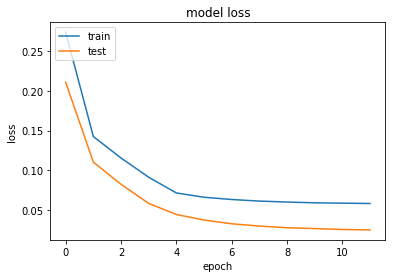

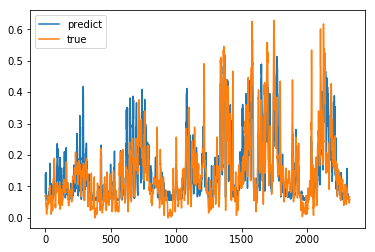

Test RMSE: 14.815
Test MAPE: 44.846
Comparison with actual data


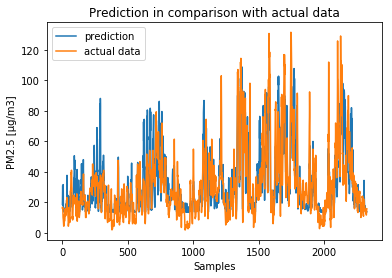

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 8)              512       
_________________________________________________________________
lstm_11 (LSTM)               (None, 1)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________
    temperature  humidity  wind  pressure  dew_point  visibilty  \
0            16        87     1    100800         13      20000   
1            16        86     2    100800         13      15000   
2            15        89     2    100800         13      10000   
3       

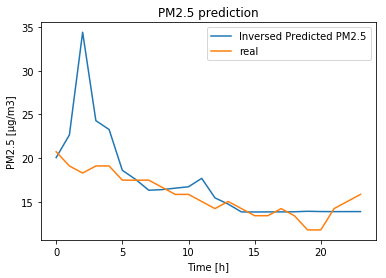

In [10]:
import pandas as pd                                
import numpy as np
from numpy import genfromtxt
#from keras.utils.visualize_util import to_graph
from keras.models import Sequential
#from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, LSTM
from keras.activations import softmax
from keras import losses
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras.utils import plot_model
from numpy import array
import matplotlib.pyplot as plt
import sys
import keras.layers as L
import keras.models as M
from numpy import concatenate
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import mean_squared_error
from keras.metrics import mse, mae, mape
import h5py
from sklearn.externals import joblib


# READ DATA AND CHOOSE COLUMNS
sensor_location = pd.read_csv('/home/marietta/MGR/Data/Sensors/sensor_locations.csv')
#airly_all = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/2-2017airly.csv')
airly_all = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/2-2017airly-versionwithprediction.csv')
weather = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/weather_forecast.csv')

airly_all = airly_all.drop('UTC_time', axis=1)
#airly_all_142 = airly_all[['142_temperature', 'widzialnosc_operatora', 'opad_za_6_godzin', '142_pm25']].copy()
airly_all_142 = airly_all[['142_temperature', '142_humidity', 'predkosc_wiatru', '142_pressure', 'temperatura_punktu_rosy', 'widzialnosc_operatora', 'lookback_24', '142_pm25']].copy()
#airly_all_142 = airly_all[['142_temperature', '142_humidity', 'predkosc_wiatru', 'lookback_24', '142_pm25']].copy()
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 
scaled = scaler.fit_transform(airly_all_142)
Xairly_all_142 = scaled[:, [0, 1, 2, 3, 4, 5, 6]]
Yairly_all_142 = scaled[:, 7]

#############
#Yairly_all_142 = Yairly_all_142[2160:2210]
#plt.plot(Yairly_all_142, "o", label='predict')
#plt.show()
#sys.exit(0)

# SPLIT TO TRAIN AND TEST DATA
train_sizeX = int(len(Xairly_all_142) * 0.73)
test_sizeX = int(len(Xairly_all_142) * 0.27)
train_sizeY = int(len(Yairly_all_142) * 0.73)
test_sizeY = int(len(Yairly_all_142) * 0.27)
trainX = Xairly_all_142[0:train_sizeX]
testX = Xairly_all_142[train_sizeX:] 
trainY = Yairly_all_142[0:train_sizeY]
testY = Yairly_all_142[train_sizeY:]

# RESHAPE INPUT DATA TO BE 3D
trainX = np.reshape(trainX, (-1, 1, 7))
testX = np.reshape(testX, (-1, 1, 7))

# BUILD MODEL
model = Sequential()
model.add(LSTM(8, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)),
model.add(LSTM(1))
#model.add(LSTM(8, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False)),
#model.add(Dense(2,activation='softmax'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=12, batch_size=16, validation_split=0.33, verbose=2)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# prediction vs. true
prediction = model.predict(testX)
a = int(len(prediction)) - 1305
b = int(len(prediction)) - 1105
#prediction = prediction[a:b]
#testY = testY[a:b]

plt.plot(prediction, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

#cheat in order to reshape
prediction_reshaped = np.zeros((len(prediction), 8))
testY_reshaped = np.zeros((len(testY), 8))

prediction_r = np.reshape(prediction, (len(prediction),))
testY_r = np.reshape(testY, (len(testY),))

prediction_reshaped[:,1] = prediction_r
testY_reshaped[:,1] = testY_r

prediction_inversed = scaler.inverse_transform(prediction_reshaped)[:,1]
testY_inversed = scaler.inverse_transform(testY_reshaped)[:,1]

#RMSE
rmse = sqrt(mean_squared_error(testY_inversed, prediction_inversed))
#rmse = sqrt(mean_squared_error(testY, prediction))
print('Test RMSE: %.3f' % rmse) # błąd średniokwadratowy

#MAPE
mape = mean_absolute_percentage_error(testY_inversed, prediction_inversed)
#mape = mape(testY_inversed, prediction_inversed)
print('Test MAPE: %.3f' % mape)

print("Comparison with actual data")
plt.plot(prediction_inversed, label='prediction')
plt.plot(testY_inversed, label='actual data')
plt.title('Prediction in comparison with actual data')
plt.xlabel('Samples')
plt.ylabel('PM2.5 [µg/m3]')
#plt.plot(prediction, label='predict')
#plt.plot(testY, label='actual', alpha=0.5)
plt.legend()
plt.show()

#Model graph
#plot_model(model, to_file='/home/marietta/MGR/Data/model.png')

model.output_shape 
model.summary()
model.get_config()
model.get_weights() 


# SAVE MODEL
model.save('/home/marietta/MGR/lstm_model.h5')


#---------------------------------------------------------------------
#NEW DATA

weather_file = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/weather_forecast1306copy.csv')

dates = weather_file[['UTC_time']].copy()
weather_data = weather_file.drop('UTC_time', axis=1)
weather = weather_data[['temperature', 'humidity', 'wind', 'pressure', 'dew_point', 'visibilty', 'yesterday_pm25_24', 'today_pm25_validation']].copy()
print(weather)

validation = weather_data[['today_pm25_validation']].copy()
print(validation)
scaler_filename = "scaler.save"
scaled = scaler.transform(weather)
dataX = scaled[:, [0, 1, 2, 3, 4, 5, 6]]
validation = scaled[:, 7]
print(validation)
dataX = np.reshape(dataX, (-1, 1, 7))
oursuperprediction= model.predict(dataX, verbose=0)


print("PREDICTION")
#weather_prediction_inversed = weather_prediction_inversed[1:32]
oursuperprediction = oursuperprediction[1:25]
validation = validation[1:25]
print(validation)
#real_pm25 = real_pm25[1:25]
print(oursuperprediction)




#cheat in order to reshape

prediction_reshaped = np.zeros((len(oursuperprediction), 8))
validation_reshaped = np.zeros((len(validation), 8))

prediction_r = np.reshape(oursuperprediction, (len(oursuperprediction),))
validation_r = np.reshape(validation, (len(validation),))

prediction_reshaped[:,1] = prediction_r
validation_reshaped[:,1] = validation_r

oursuperprediction_inversed = scaler.inverse_transform(prediction_reshaped)[:,1]
validation_inversed = scaler.inverse_transform(validation_reshaped)[:,1]

print(oursuperprediction_inversed)
print(validation)

#plt.set_index(weather_file[[UTC_time]]).plot()
#plt.plot(oursuperprediction, label='Predicted PM2.5')
plt.plot(oursuperprediction_inversed, label='Inversed Predicted PM2.5')
plt.plot(validation_inversed, label='real')
plt.title('PM2.5 prediction')
plt.xlabel('Time [h]')
plt.ylabel('PM2.5 [µg/m3]')
plt.legend()
plt.show()



In [52]:
from keras.models import load_model
import h5py
model = load_model('/home/marietta/MGR/lstm_model.h5')
#print(prediction_inversed)
weather_file = pd.read_csv('/home/marietta/MGR/Data/Sensors/2017airly/weather_forecast1306copy.csv')

dates = weather_file[['UTC_time']].copy()
weather_data = weather_file.drop('UTC_time', axis=1)
weather = weather_data[['temperature', 'humidity', 'wind', 'pressure', 'dew_point', 'visibilty', 'yesterday_pm25_24', 'today_pm25_validation']].copy()
validation = weather_data[['today_pm25_validation']].copy()
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.transform(weather)
dataX = scaled[:, [0, 1, 2, 3, 4, 5, 6]]
validation = scaled[:, 7]
dataX = np.reshape(dataX, (-1, 1, 7))

oursuperprediction= model.predict(dataX, verbose=0)

print("PREDICTION")

oursuperprediction = oursuperprediction[1:25]
validation = validation[1:25]

print(oursuperprediction)
print(validation)

#cheat in order to reshape

prediction_reshaped = np.zeros((len(oursuperprediction), 8))

prediction_r = np.reshape(oursuperprediction, (len(oursuperprediction),))

prediction_reshaped[:,1] = prediction_r

oursuperprediction_inversed = scaler.inverse_transform(prediction_reshaped)[:,1]

print(oursuperprediction_inversed)

#plt.set_index(weather_file[[UTC_time]]).plot()
#plt.plot(oursuperprediction, label='Predicted PM2.5')
plt.plot(oursuperprediction_inversed, label='Inversed Predicted PM2.5')
plt.plot(validation, label='real')
plt.title('PM2.5 prediction')
plt.xlabel('Time [h]')
plt.ylabel('PM2.5 [µg/m3]')
plt.legend()
plt.show()

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
#co to batchsize, co to epoch?\n",
#batchsize - numer of samples\n",
#batchsize - number of rows\n",
#timestep - time interval\n",
#input dim - number of columns\n",
#[samples, time steps, features]\n",
#input_shape is supposed to be (timesteps, n_features)\n",
\n",
"1. textX\n",
"2. prediction\n",
"3. forecast"

In [40]:
testdata = pd.read_csv('/home/marietta/MGR/Data/minmaxscaler_eksperyment.csv')
testdata = testdata[['dane1', 'dane2', 'dane3', 'dane4']].copy()
print("ORYGINALNE DANE")
print(testdata)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(testdata)
print("DANE PRZESKALOWANE")
print(scaled)
dataX = scaled[:, [0, 1, 2]]
dataY = scaled[:, 3]

print("DANE X PRZESKALOWANE")
print(dataX)
print("DANE Y PRZESKALOWANE")
print(dataY)
print("**********************")
print("ODWRÓCENIE SKALOWANIA")

testdata_inversed = scaler.inverse_transform(scaled)

print("ODWRÓCONE DANE")
print(testdata_inversed)


ORYGINALNE DANE
   dane1  dane2  dane3  dane4
0      1      5      1      6
1      2      5      2     10
2      4      5      1      2
3      6      5      2      3
4      8      5      1      6
5     10      5      3      1
DANE PRZESKALOWANE
[[0.         0.         0.         0.55555556]
 [0.11111111 0.         0.5        1.        ]
 [0.33333333 0.         0.         0.11111111]
 [0.55555556 0.         0.5        0.22222222]
 [0.77777778 0.         0.         0.55555556]
 [1.         0.         1.         0.        ]]
DANE X PRZESKALOWANE
[[0.         0.         0.        ]
 [0.11111111 0.         0.5       ]
 [0.33333333 0.         0.        ]
 [0.55555556 0.         0.5       ]
 [0.77777778 0.         0.        ]
 [1.         0.         1.        ]]
DANE Y PRZESKALOWANE
[0.55555556 1.         0.11111111 0.22222222 0.55555556 0.        ]
**********************
ODWRÓCENIE SKALOWANIA
ODWRÓCONE DANE
[[ 1.  5.  1.  6.]
 [ 2.  5.  2. 10.]
 [ 4.  5.  1.  2.]
 [ 6.  5.  2.  3.]
 [ 8.  5.